# Tests d'Hypothèse

In [41]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# I. Etude Univarie
# Test binomial - var discrète
-  **Évaluer si le nombre de succès (ou échecs) dans une série d'éssais binaires suit une distribution théorique.**
## Exemple d'application de la fonction binomtest - Lancer d'une pièce

In [4]:
from scipy.stats import binomtest

n = 40
k = 28
p0 = 0.5 # --> H0

# On fixe la tolérance à alpha
alpha = 0.05

# Test binomial bilatéral
p_value = binomtest(k=k, n=n, p=p0)
p_value.pvalue

if p_value.pvalue < alpha:
    print(f"La probabilité d'observer 28 piles (ou plus) sous l'hypothèse H0 est très " 
          f"fiable {p_value.pvalue.round(2)}% -> On rejet H0, \nla pièce est probablement biaisée!")
else:
    print("Nous avons suffisament d'évidences pour rejeter H0")

La probabilité d'observer 28 piles (ou plus) sous l'hypothèse H0 est très fiable 0.02% -> On rejet H0, 
la pièce est probablement biaisée!


# Test Chisquare -> Var discrète
- **Compare les fréquences observées à des féquences attendues dans plusieurs catégories (>binaires)**

H0 : "Les clients donnent les pourboires : 20% le jeudi, 10% le vendredi, 40% le samedi, 30% le dimanche"

In [5]:
# Théorie
expected_frequencies = np.array([0.2, 0.1, 0.4, 0.3])
expected_frequencies = expected_frequencies * len(df)

# fixer le seuil de télérance alpha
alpha = 0.02

# Expérience
observed_freqiencies = df['day'].value_counts(normalize=False, sort=False).round(2)

# Calcul p_value
from scipy.stats import chisquare
p_value = chisquare(f_obs=observed_freqiencies, f_exp=expected_frequencies).pvalue.round(2)

# Comparaison
if p_value < alpha:
    print(f"Nous avons suffisament d'évidence pour rejeter H0, p_value {p_value} est inférieur à alpha {alpha}!")
else:
    print(f"Nous n'avons pas suffisament d'évidences pour rejeter H0, p_value {p_value} est supérieur à alpha {alpha}!")

Nous n'avons pas suffisament d'évidences pour rejeter H0, p_value 0.11 est supérieur à alpha 0.02!


### Exo : Contrôle de la distribution des défauts dans un processus de production
- Une usine de fabrication d'éléments électroniques identifie quatre catégories lors du contrôle qualité :
  - Défaut A
  - Défaut B
  - Défaut C
  - Aucun défaut

- La distribution théorique attendue pour ces catégories est la suivante :
  - Défaut A : 10 %
  - Défaut B : 5 %
  - Défaut C : 5 %
  - Aucun défaut : 80 %

- Un échantillon de 200 pièces est prélevé, et les observations sont :
  - Défaut A : 30
  - Défaut B : 12
  - Défaut C : 8
  - Aucun défaut : 150

- Question :
Testez, au niveau de signification α=0.05, si la distribution observée est conforme à la distribution théorique attendue.

In [69]:
# Théorie (attendues) pour n = 200 pièces
expected_frequencies = np.array([0.1, 0.05, 0.05, 0.8])
expected_frequencies = expected_frequencies * 200

# Observées
observed_frequencies = np.array([30, 12, 8, 150])

# alpha
alpha = 0.05

# Calcul p_value
p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies).pvalue.round(2)
print(p_value)

# Comparaison
if p_value < alpha:
    print(f"La distribution observée des défauts dans le processus de production DEFFÈRE SIGNIFICATIVEMENT de la distribution attendue!")
else:
    print(f"La distribution observée des défauts dans le processus de production NE DEFFÈRE PAS SIGNIFICATIVEMENT de la distribution attendue!")




0.09
La distribution observée des défauts dans le processus de production NE DEFFÈRE PAS SIGNIFICATIVEMENT de la distribution attendue!


# Test student -> var continue

### Exo d'application en Maintenance Prédictive
- **Contexte :**
Dans une usine, on surveille la température de fonctionnement d'un équipement critique. La température de référence (théorique) pour un fonctionnement optimal est de 75°C. Un capteur enregistre les températures de 30 machines. Le service maintenance souhaite vérifier si la moyenne réelle des températures diffère significativement de 75°C, ce qui pourrait indiquer un problème nécessitant une intervention.

- **Données :** Supposons que les mesures de température (en °C) enregistrées soient les suivantes (exemple fictif)

temperatures = [74.2, 75.1, 75.3, 76.0, 74.8, 75.5, 76.2, 75.0, 74.9, 75.6,
                75.1, 74.7, 75.8, 76.1, 75.2, 74.6, 75.3, 75.4, 76.0, 75.0,
                74.8, 75.7, 75.9, 75.0, 74.9, 75.2, 75.6, 74.8, 75.4, 75.1]



In [24]:
print("H0 : La température optimale de fonctionnement du l'équipement est de 75°C.\n")
popmean = 75.0

# alpha 
alpha = 0.05

# Données observées
temperatures = np.array([74.2, 75.1, 75.3, 76.0, 74.8, 75.5, 76.2, 75.0, 74.9, 75.6,
                         75.1, 74.7, 75.8, 76.1, 75.2, 74.6, 75.3, 75.4, 76.0, 75.0,
                         74.8, 75.7, 75.9, 75.0, 74.9, 75.2, 75.6, 74.8, 75.4, 75.1])

# Calcul de p_value
from scipy.stats import ttest_1samp
t_stat, p_value = ttest_1samp(a=temperatures, popmean=popmean)

# Comparaison 
if p_value < alpha:
    print("La températeure moyenne des machines diffère significativement de la températeure optimale de fonctionnement du l'équipement,"
    "\nindiquant un potentiel problème de fonctionnement!")
else:
    print("La températeure moyenne des machines ne diffère pas significativement de la températeure optimale de fonctionnement du l'équipement.")


H0 : La température optimale de fonctionnement du l'équipement est de 75°C.

La températeure moyenne des machines diffère significativement de la températeure optimale de fonctionnement du l'équipement,
indiquant un potentiel problème de fonctionnement!


# II. Etude Multivarie
# Test chi2_contingency -> var discrète - var discrète
### Exo : Association entre bruit anormal et défaillance
- Contexte :
Dans un centre de maintenance, on souhaite savoir si la présence d'un bruit anormal dans les machines est associée à une défaillance ultérieure.

- Données :
Sur un échantillon de 150 machines, les observations sont les suivantes :

  - Machines présentant un bruit anormal :
       - Défaillance : 20
       - Pas de défaillance : 40
       - Total : 60

  - Machines sans bruit anormal :
      - Défaillance : 10
      - Pas de défaillance : 80
      - Total : 90

- Objectif :
Tester l'hypothèse que le bruit anormal est indépendant de la survenue de défaillance (H₀ : pas d'association) contre H₁ : il existe une association, au niveau de signification α=0.05.

| état | Défaillance | Pas de défaillance 3 |
|-----------|-----------|-----------|
| Bruit anormal  | 20 | 40 |
| Pas de bruit  | 10  | 80 |

In [25]:
from scipy.stats import chi2_contingency

tableau = [[20, 40],
           [10, 80]]

# alpha = 0.05

chi2_stat, p_value, dof, expected = chi2_contingency(tableau)

if p_value < alpha:
    print("On rejet H0! On conclut qu'il existe une association significative entre le buit anormal et la survenue "
    "d'une défaillance.\nOn pratique, cela suggère que la bruit anormal peut être un indicateur utile dans un système "
    "de maintenance prédictive")
else:
    print("Nous n'avons pas suffisament d'évidences pour rejeter H0")

On rejet H0! On conclut qu'il existe une association significative entre le buit anormal et la survenue d'une défaillance.
On pratique, cela suggère que la bruit anormal peut être un indicateur utile dans un système de maintenance prédictive


# Test student (2 échantillons indépendants)
**"Compare la moyenne d'une variable continue entre deux groupes indépendants pour déterminer si la différence observée est statiquement significative"**

### Exercice d'Application en Maintenance Prédictive
**Contexte :**
Dans le cadre de la maintenance prédictive, on souhaite étudier si la vibration moyenne d’un équipement diffère entre les machines qui ont présenté une défaillance et celles qui n’en ont pas présenté. L'hypothèse est que des vibrations anormales pourraient être un indicateur précurseur de défaillance.

**Données :**
- Groupe 1 (Machines ayant présenté une défaillance) :

Vibration (en mm/s) mesurée sur 15 machines :
[4.2, 4.5, 4.1, 4.8, 4.6, 4.7, 4.3, 4.9, 4.4, 4.6, 4.8, 4.2, 4.7, 4.5, 4.3]

- Groupe 2 (Machines sans défaillance) :

Vibration (en mm/s) mesurée sur 20 machines :
[3.9, 4.0, 4.1, 3.8, 4.0, 3.9, 4.1, 4.2, 3.8, 4.0, 4.1, 3.9, 4.0, 4.1, 3.8, 4.0, 4.1, 3.9, 4.0, 4.1]

**Objectif :**
Tester l'hypothèse que la moyenne de vibration est différente entre les deux groupes.

Text(0.5, 1.0, 'Vibrations des machines : Défaillances vs Sans défaillances')

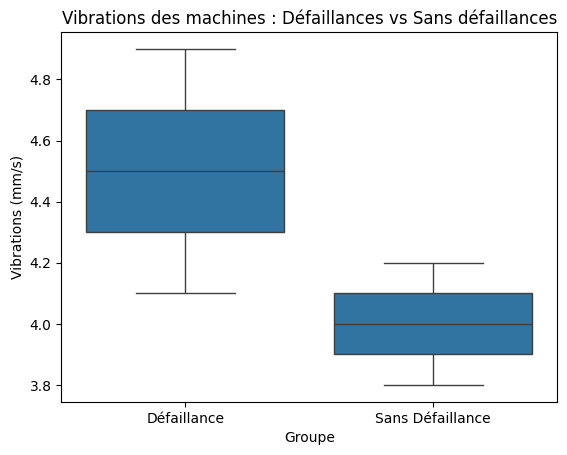

In [42]:
groupe1 = [4.2, 4.5, 4.1, 4.8, 4.6, 4.7, 4.3, 4.9, 4.4, 4.6, 4.8, 4.2, 4.7, 4.5, 4.3]
groupe2 = [3.9, 4.0, 4.1, 3.8, 4.0, 3.9, 4.1, 4.2, 3.8, 4.0, 4.1, 3.9, 4.0, 4.1, 3.8, 4.0, 4.1, 3.9, 4.0, 4.1]

data = {
    "Vibrations (mm/s)": groupe1 + groupe2,
    "Groupe": ["Défaillance"] * len(groupe1) + ["Sans Défaillance"] * len(groupe2)
}

df = pd.DataFrame(data)

sns.boxplot(data=df, x='Groupe', y='Vibrations (mm/s)')
plt.title("Vibrations des machines : Défaillances vs Sans défaillances")

In [53]:
print("H0 : Les moyennes des vibrations sont égales pour les machines avec et sans défaillance.\n")

alpha = 0.05

vibration_defaillance = groupe1
vibrations_sans_defaillance = groupe2

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(a=groupe1, b=groupe2)

if p_value < alpha:
    print("On rejete H0; la moyenne des vibrations des machines avec défaillance diffère significativement de celle des machines sans défaillance."
    "\n=> Les vibrations peut servir de signal précurseur dans la maintenance prédictive.")
else:
    print("Nous n'avons pas suffisamment d'évidences pour rejeter H0")


H0 : Les moyennes des vibrations sont égales pour les machines avec et sans défaillance.

On rejete H0; la moyenne des vibrations des machines avec défaillance diffère significativement de celle des machines sans défaillance.
=> Les vibrations peut servir de signal précurseur dans la maintenance prédictive.


# Test ANOVA (>= 3 échontillons indépendants)
**"Comparer les moyennes de 3 goupes ou plus pour déterminer s'il existe une différence statistiquement significative entre au moins deux d'entre d'eux"**

### Exo d'application en Maintenance prédictive
**Contexte :**
Dans le cadre de la maintenance prédictive, on souhaite étudier l'effet de trois types de stratégies de maintenance sur la température moyenne de fonctionnement d’un équipement critique.
On suppose que la température optimale est de 75°C et que les variations peuvent être liées au type de maintenance appliqué.

**Groupes de Données :**
- Groupe 1 (Maintenance prédictive A) :

Températures mesurées sur 10 équipements :
[74.8, 75.2, 75.0, 74.9, 75.1, 75.3, 74.7, 75.0, 75.1, 75.0]

- Groupe 2 (Maintenance prédictive B) :

Températures mesurées sur 10 équipements :
[75.5, 75.7, 75.6, 75.4, 75.8, 75.6, 75.7, 75.5, 75.6, 75.7]

- Groupe 3 (Maintenance standard) :

Températures mesurées sur 10 équipements :
[74.9, 75.0, 74.8, 74.7, 75.1, 74.9, 74.8, 75.0, 74.9, 75.0]

**Objectif :**
Tester l'hypothèse que la moyenne des températures est la même pour les trois stratégies de maintenance (H₀) contre l'hypothèse qu'au moins l'une diffère (H₁).

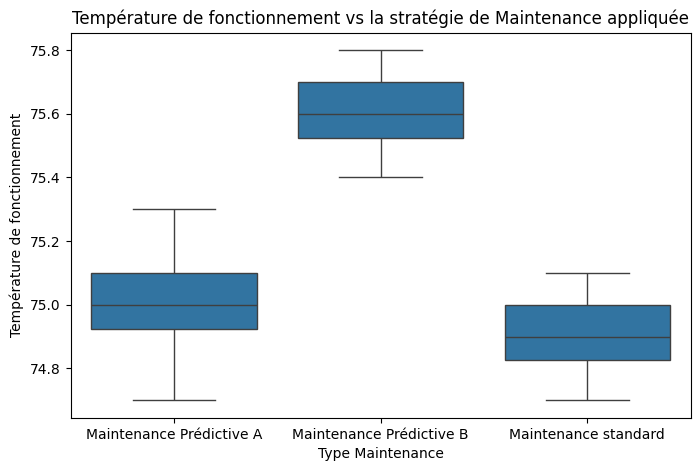

In [80]:
groupe1 = [74.8, 75.2, 75.0, 74.9, 75.1, 75.3, 74.7, 75.0, 75.1, 75.0]
groupe2 = [75.5, 75.7, 75.6, 75.4, 75.8, 75.6, 75.7, 75.5, 75.6, 75.7]
groupe3 = [74.9, 75.0, 74.8, 74.7, 75.1, 74.9, 74.8, 75.0, 74.9, 75.0]

data = {
    "Type Maintenance": ["Maintenance Prédictive A"] * len(groupe1) + ["Maintenance Prédictive B"] * len(groupe2) + ["Maintenance standard"] * len(groupe3),
    "Température de fonctionnement": groupe1 + groupe2 + groupe3 
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Type Maintenance', y='Température de fonctionnement')
plt.title("Température de fonctionnement vs la stratégie de Maintenance appliquée")
plt.show()

In [85]:
print('H0 : La Température moyenne de fonctionnement est la même pour les trois stratégies de maintenance appliquée.\n')

alpha = 0.05

df.groupby('Type Maintenance')['Température de fonctionnement'].apply(list)

from scipy.stats import f_oneway
t_stat, p_value = f_oneway(*df.groupby('Type Maintenance')['Température de fonctionnement'].apply(list))

if p_value < alpha:
    print("On rejet H0; le type de stratégie de maintenance a un impact sur la température de fonctionnement.")
else:
    print("Aucune différence significative n'a été détectée entre les groupes au niveau de température.")



H0 : La Température moyenne de fonctionnement est la même pour les trois stratégies de maintenance appliquée.

On rejet H0; le type de stratégie de maintenance a un impact sur la température de fonctionnement.
